<a href="https://colab.research.google.com/github/jhj1819/study_ai/blob/main/2%EC%9E%A5_2%EC%A0%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [17]:
# 넘파이로 데이터 준비하기 (리스트보다 넘파이로 하는게 성능좋음)
import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))

fish_target = np.concatenate((np.ones(35), np.zeros(14)))

print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [18]:
# 사이킷런으로 train set과 test set 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42) ## stratify = fish_target: 클래스 비율에 맞게 데이터 나눔

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

print(kn.predict([[25,150]])) # 앗. 도미인데 빙어라고하네..

[0.]


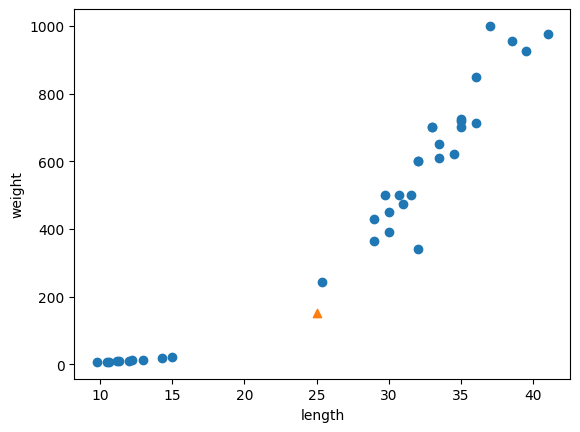

In [19]:
# 산점도로 확인해보자 (육안상 도미와 더 가깝지만 단위가 다르기때문에 실제로는 빙어와 더 가까움)
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^') # marker 매개변수는 모양을 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
distance, indexes = kn.kneighbors([[25, 150]]) # 가까운 이웃의 거리와 인데스 반환

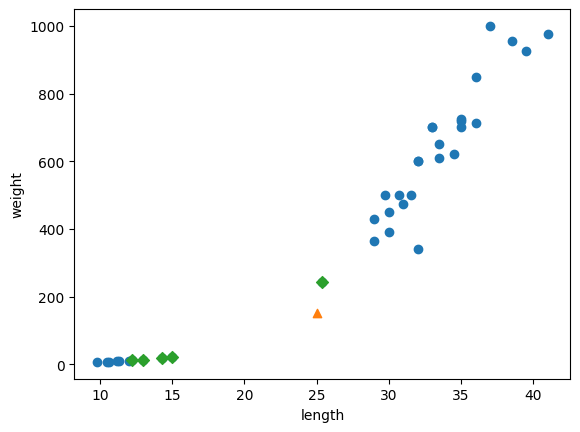

In [21]:
# 이웃한 샘플을 따로 구분해서 산점도 그림
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [22]:
print(train_input[indexes])
print(distance)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


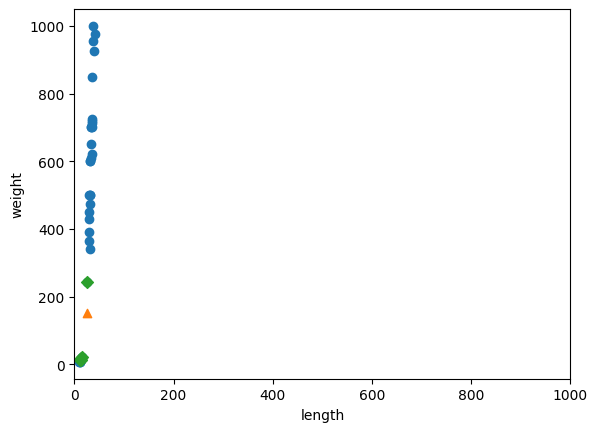

In [23]:
# 현재 x축의 범위는 10~40 y축의 범위는 0~1000임. 이 범위를 동일하게 맞춰보자
# x축의 범위를 0~1000으로 맞추기
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker = 'D')
plt.xlim((0, 1000)) # 범위를 0 ~ 1000으로 맞춤
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


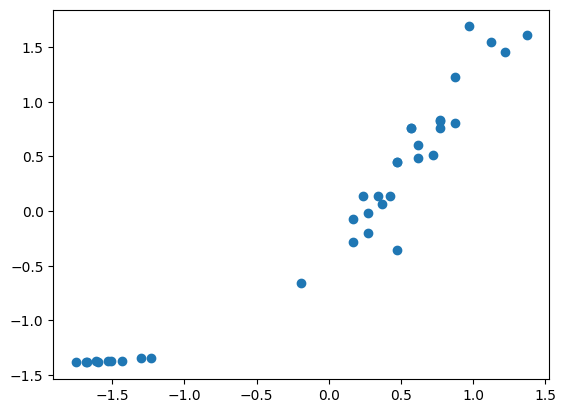

In [24]:
# 특성간 스케일(데이터를 표현하는 범위)가 다른 경우 일정한 기준으로 맞춰줘야함 = 데이터 전처리
# 가장 널리 사용하는 방법으로 표준점수가 있음.      표준점수란? 특성값이 평균에서 표준편차의 몇 배만큼 떨어져있는지 나타냄: 표준점수 = (특성값 - 평균) / 표준편차
# 넘파이를 이용한 표준편차
mean = np.mean(train_input, axis=0) # 평균계산 , 각 특성별로 계산해야하므로 axis = 0 / 0: 행을따라 각 열의 통게값을 냄
std = np.std(train_input, axis=0) # 표준편차 계산
print(mean, std)

train_scaled = (train_input - mean) / std # 넘파이가 알아서 train_input의 모든 행에서 mean의 두 평균값을 빼줌 => 브로드캐스팅이라함

plt.scatter(train_scaled[:,0], train_scaled[:,1])

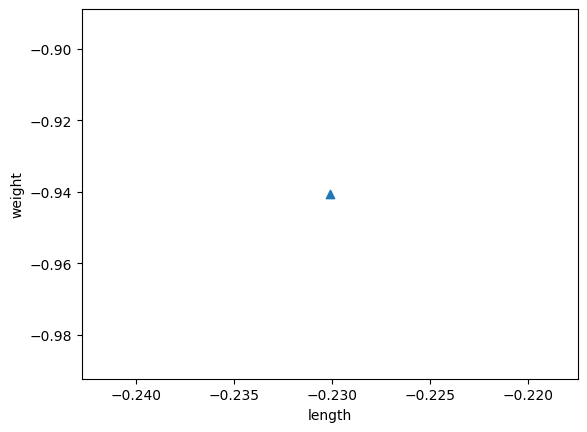

In [25]:
# plt.scatter(25, 150, marker = '^') 이것도 표준편차로 바꿔서 넣어줘야 올바른 그래프
new = ([25, 150] - mean) / std
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 위 산점도는 표준편차로 변환하기 전 산점도와 비슷한 모양이며, 추가로 x,y축의 특성의 범위가 비슷한 범위를 차지하도록 변함.

In [26]:
# 주의사항 변환한 데이터로 다시 훈련, 테스트를할때 샘플데이터(수상한 도미)와 테스트세트 역시 변환해줘야함
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std # mean과 std는 훈련세트와 동일한걸 사용
kn.score(test_scaled, test_target)
print(kn.predict([new])) # 이제 도미로 잘 예측함.

[1.]


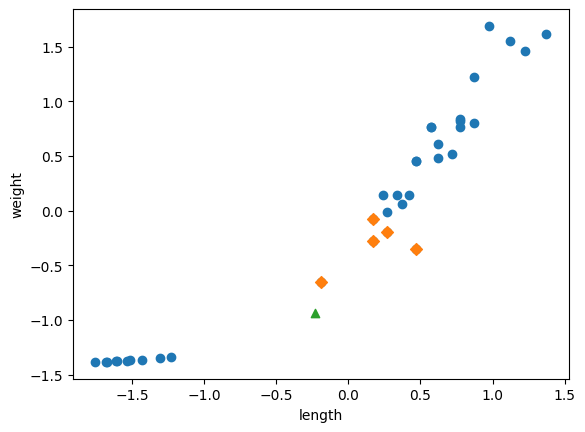

In [27]:
# 산점도로 다시 확인
distance, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = 'D')
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()